In [70]:
import numpy as np
import matplotlib.pylab as plt
 # 쥬피터에서만 쓸수 있음 다른곳에서는 이 라인 제거 필요 : 그림 그릴때 여기서 나타낼지 아닌지
%matplotlib inline  
#레티나 디스플레이용임..조금이라도 고화질의 레티나 디스플레이에서 쓸때는 필요. 깃허브에서 레티나까지 고려하면 성의있게 짠 코드
%config InlineBackend.figure_format = 'retina'  

In [71]:
X = np.array([20,21,22,23,24,25,26])
Y = np.array([15,16,21,33,42,60,64])

In [72]:
# 목적함수 : Cost Function , Loss Function
def cost_f(a,b):
    return np.sum((a * X + b - Y)**2)

# 함수는 수학적 아이디어작성하기 파일에서 구했음(참고하세요) : x의 편미분과 y의 편미분
def diff_a(a,b):
    return np.sum(2*X*(X*a - Y + b))

def diff_b(a,b):
    return np.sum(2*X*a - 2*Y + 2*b)

In [73]:
# optimization, minimization

def gradient_descent1D(func, diff_a, a0, learning_rate=0.001, MaxIter=10,verbose=True):
    
    paths=[]
    for i in range(MaxIter):
        a1 = a0 - learning_rate * diff_a(a0)
        if verbose:
            print(i, a1, func(a1))
        a0 =  a1
        paths.append(a0)
        
    return (a0, func(a0), paths)

In [77]:
# a0 = [[a]
#       [b]]


def gradient_descent2D(func, diff_a, diff_b, a0, learning_rate=0.01, MaxIter=10, verbose=True):
    paths=[a0]
    for i in range(MaxIter):
        #diff = np.array([diff_a(a0[0],a0[1]), diff_b(*a0)])  #아규먼트에 *가 붙었으므로 리스트형태로 전달
        diff = np.array([diff_a(*a0), diff_b(*a0)])  #아규먼트에 *가 붙었으므로 리스트형태로 전달
        a1 = a0 - learning_rate * diff
        if verbose:
            print(i, a1, func(*a1))
        a0 =  a1
        paths.append(a0)
        
    return(a0,func(*a0),paths) #a0를 찾으려는 것임 func(*a0)랑 paths 는 그냥 학습 과정 찍어보려는 것임, 제대로 값을줬으면 함수값이 낮아져야 함
        

In [87]:
# 구하고자 하는 값은 벡터값 a0임
a=-10
b=2
a0=np.array([a,b])
print(a0)

result, _, _=gradient_descent2D(cost_f, diff_a, diff_b, a0, learning_rate=0.00001, MaxIter=10000000, verbose=False)

print(result)

[-10   2]
[   9.14264417 -174.42363601]


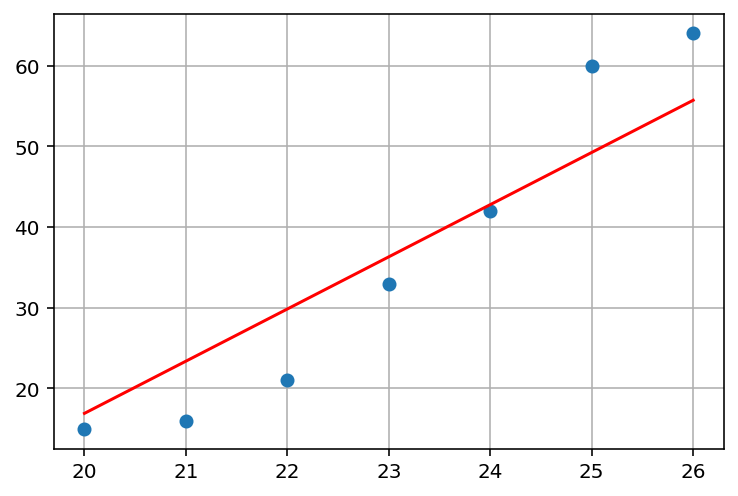

In [86]:
a_opt = result[0]
b_opt = result[1]

plt.plot(X,Y, 'o')
plt.grid()
plt.plot(X, a_opt*X + b_opt, 'r-')
plt.show()

In [88]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'  

In [89]:
def f(x):
    return 1.0/3.0 * x + 5.0

In [90]:
x=np.linspace(-20,60,50)
y=f(x)

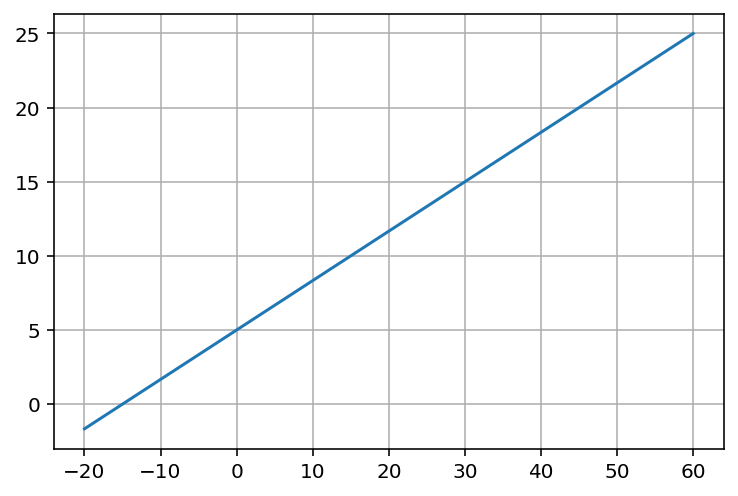

In [91]:
plt.plot(x,y)
plt.grid()
plt.show()

In [99]:
#np.random.rand(len(x))
np.random.seed(10)
ry = y + 10 * np.random.rand(len(x))
ry

array([11.84823055, 18.18494153, 12.23988341, 17.24807616, 23.0408235 ,
       19.35310442, 23.5232316 , 16.64327198, 23.50101124, 18.19602135,
       29.42181579, 19.89988269, 17.03736532, 20.99114603, 31.72698348,
       14.06397181, 20.29461331, 12.89417164, 22.24367615, 16.22368221,
       16.47747559, 13.42996448, 24.73313985, 31.00498451, 28.4581242 ,
       36.22776696, 21.32784022, 35.96693146, 39.67980927, 34.60411079,
       35.75961263, 30.3387784 , 37.77398282, 29.1502956 , 33.34388478,
       21.18612984, 30.48036606, 27.46825393, 31.64405586, 43.63481034,
       27.0296275 , 38.02065985, 26.64131619, 33.74493735, 36.58641958,
       32.36529406, 36.7979413 , 49.02035897, 42.73184026, 43.09635241])

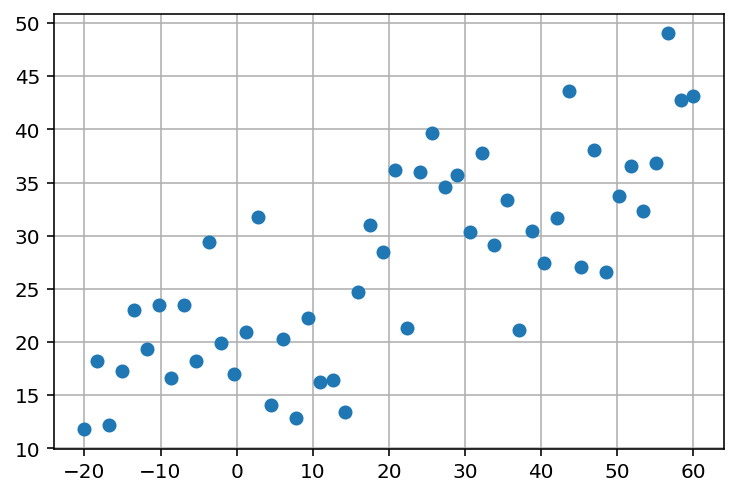

In [100]:
plt.plot(x,ry, 'o')
plt.grid()
plt.show()

#아래의 랜덤 데이터를 기반으로 함수 구하기

In [101]:
#아래와 동일함 위의 목적함수 쓰고 미분 편미분 함수 그대로 써서 하면 됨
#X=x
#Y=xy

In [95]:
print(x) #x를 갖고 있음(아까랑 비교하면 온도)

[-20.         -18.36734694 -16.73469388 -15.10204082 -13.46938776
 -11.83673469 -10.20408163  -8.57142857  -6.93877551  -5.30612245
  -3.67346939  -2.04081633  -0.40816327   1.2244898    2.85714286
   4.48979592   6.12244898   7.75510204   9.3877551   11.02040816
  12.65306122  14.28571429  15.91836735  17.55102041  19.18367347
  20.81632653  22.44897959  24.08163265  25.71428571  27.34693878
  28.97959184  30.6122449   32.24489796  33.87755102  35.51020408
  37.14285714  38.7755102   40.40816327  42.04081633  43.67346939
  45.30612245  46.93877551  48.57142857  50.20408163  51.83673469
  53.46938776  55.10204082  56.73469388  58.36734694  60.        ]


In [96]:
print(y) #y를 갖고 있음(아까랑 비교하면 아이스크림 판매량)

[ 4.13502412 17.97742204  5.90340106  9.76003734 18.05575338 17.10513796
 21.54260295  9.03796486 21.80990287 17.31262321 22.56821761 10.36594923
 16.99788266 15.8692234  23.60077386  7.93871114 13.07706014  9.97541096
 13.06593492  9.07792437 11.05203191 12.00826401 20.99973225 24.26364836
 24.03979246 31.88762703 15.15017044 30.83554903 33.17583745 28.59372125
 27.70738066 25.12230688 28.68749402 25.95793471 32.43929129 18.17912927
 29.34052244 19.18144067 31.17509267 37.37193886 21.55376594 29.82778989
 24.65184079 25.17643433 33.06989319 24.81881715 33.83832423 40.18099417
 39.47672388 41.44619343]


In [ ]:
# y = ax+b를 풀면 된다(미분하고 나서)